In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load and Explore the Data

df = pd.read_csv("sales_data.csv", encoding='ISO-8859-1')  # Adjust filename

# View top rows
df.head()

# Check data types and missing values
df.info()

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [28]:
#Data Cleaning

# Check for missing values
df.isnull().sum()

# Drop missing descriptions or Customer IDs
df = df.dropna(subset=["Description"])  # drop empty products
# Optional: fill missing CustomerID if needed

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove negative quantity values (often returns)
df = df[df['Quantity'] > 0]

# Create a 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


df.to_csv('retail_cleaned.csv', index=False)



<Axes: title={'center': 'Sales by Country'}, xlabel='Country'>

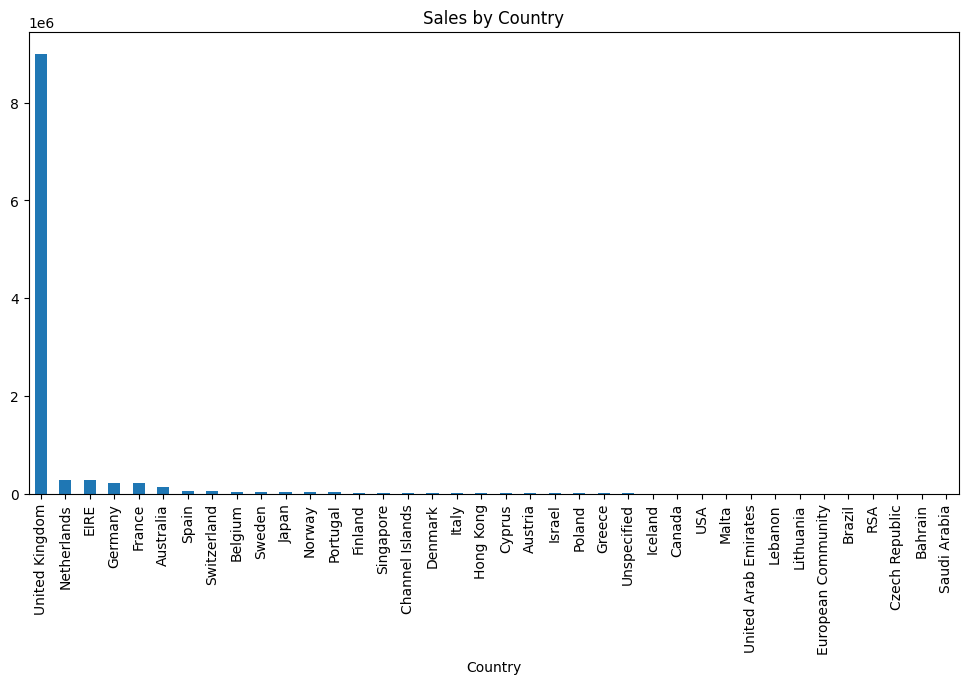

In [29]:
# Exploratory Data Analysis (EDA)

# Sales over time
sales_over_time = df.groupby(df['InvoiceDate'].dt.to_period("M"))['TotalPrice'].sum()

sales_over_time.plot(kind='line', title='Monthly Sales Trend', figsize=(12,6))

# Top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', title='Top 10 Products Sold', figsize=(10,6))

# Sales by Country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

country_sales.plot(kind='bar', title='Sales by Country', figsize=(12,6))


In [30]:
#Top Products

top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Show top 10 products
top_products_quantity.head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48478
WHITE HANGING HEART T-LIGHT HOLDER    37895
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

In [31]:
# First, make sure you have the TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

top_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

# Show top 10 products by revenue
top_products_revenue.head(10)


Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: TotalPrice, dtype: float64

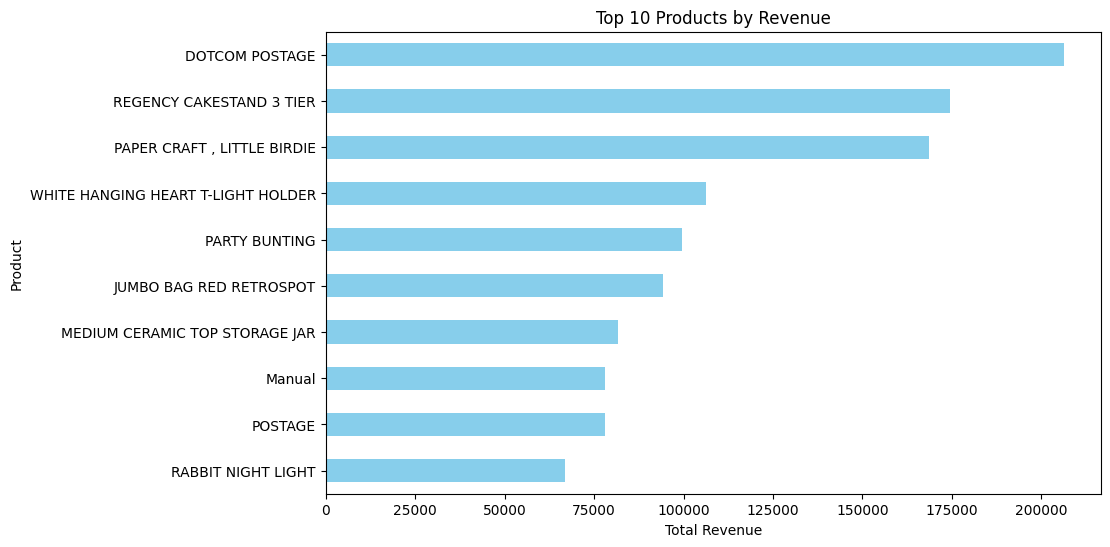

In [32]:
import matplotlib.pyplot as plt

# Plot Top 10 Products by Revenue
top_products_revenue.head(10).plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # Highest at the top
plt.show()


In [33]:
#Sales Trends
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure it's datetime
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [34]:
# Create a new column for Year-Month
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # e.g., '2011-09'

# Group by Month and calculate total sales
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

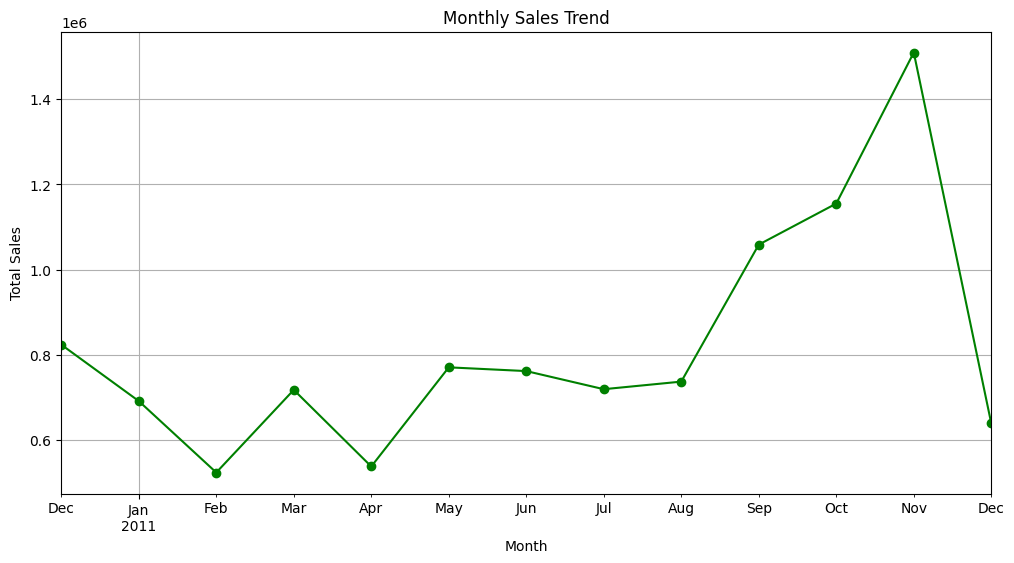

In [35]:
monthly_sales.plot(kind='line', figsize=(12,6), marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [36]:
#Total Customers

total_customers = df['CustomerID'].nunique()
print(f"Total unique customers: {total_customers}")

Total unique customers: 4339


In [37]:
#Customer Lifetime Value (CLV)

clv = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
clv.head(10)  # Top 10 most valuable customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64

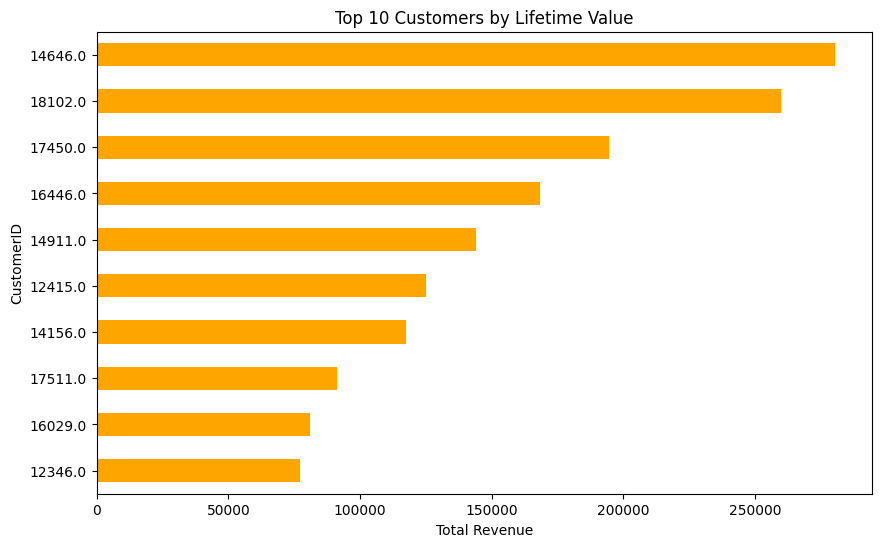

In [38]:
clv.head(10).plot(kind='barh', title='Top 10 Customers by Lifetime Value', figsize=(10,6), color='orange')
plt.xlabel('Total Revenue')
plt.ylabel('CustomerID')
plt.gca().invert_yaxis()
plt.show()

In [39]:
#Customer Purchase Frequency
purchase_freq = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
purchase_freq.head(10)  # Most frequent buyers

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

In [40]:
#Average Order Value (AOV)

aov = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
aov['AvgOrderValue'] = aov['TotalPrice'] / aov['InvoiceNo']
aov = aov.sort_values(by='AvgOrderValue', ascending=False)
aov.head(10)

,InvoiceNo,TotalPrice,AvgOrderValue
CustomerID,,,
16446.0,2,168472.50,84236.250000
12346.0,1,77183.60,77183.600000
15749.0,3,44534.30,14844.766667
15098.0,3,39916.50,13305.500000
12357.0,1,6207.67,6207.670000
12415.0,21,124914.53,5948.310952
12590.0,2,9864.26,4932.130000
12688.0,1,4873.81,4873.810000
12752.0,1,4366.78,4366.780000


In [41]:
#Customer Retention / First & Last Purchase

customer_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_dates['active_days'] = (customer_dates['max'] - customer_dates['min']).dt.days
customer_dates.sort_values(by='active_days', ascending=False).head()

,min,max,active_days
CustomerID,,,
15311.0,2010-12-01 09:41:00,2011-12-09 12:00:00,373
13777.0,2010-12-01 16:01:00,2011-12-09 12:25:00,372
12662.0,2010-12-01 13:04:00,2011-12-09 11:59:00,372
15694.0,2010-12-02 07:49:00,2011-12-09 09:44:00,372
12433.0,2010-12-01 13:24:00,2011-12-09 10:02:00,372
